In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


## Import RankNorm

In [2]:
### set file directories
fdiry = file.path(FD_RES, "results", "comparison")
fname = "result.ranknorm.starrmpra.tsv"
fpath = file.path(fdiry, fname)

### read data
dat = read_tsv(fpath)

### assign and show
dat_peak_log2fc = dat
print(dim(dat))
head(dat)

Rows: 5166 Columns: 10
── Column specification ────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (6): Chrom, Peak, TMPRA_Gene, TMPRA_Dataset, CRISPR_HCFF, Assay
dbl (4): Start, End, Log2FC, RankNorm_Total

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 5166   10


Chrom,Start,End,Peak,TMPRA_Gene,TMPRA_Dataset,CRISPR_HCFF,Assay,Log2FC,RankNorm_Total
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
chr11,4539569,4540043,chr11_4539569_4540043,HBE1,OL45,"HBE1,HBG1,HBG2,HBS1L,MYB",ASTARR,0.14501695,0.6550523
chr11,4551336,4552012,chr11_4551336_4552012,HBE1,OL45,NA,ASTARR,0.32125162,0.7560976
chr11,4553969,4555012,chr11_4553969_4555012,HBE1,OL45,NA,ASTARR,0.14529397,0.6556330
chr11,4569016,4569992,chr11_4569016_4569992,HBE1,OL45,NA,ASTARR,0.01136464,0.5673635
chr11,4577444,4578031,chr11_4577444_4578031,HBE1,OL45,NA,ASTARR,0.24524353,0.7154472
chr11,4601808,4602487,chr11_4601808_4602487,HBE1,OL45,NA,ASTARR,-0.57215284,0.1277584


## Import annotation

In [4]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "summary")
fname = "peak.summary.ccre.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath)

dat_peak_annot_ccre = dat
dat_peak_annot_ccre_v3 = dat %>% dplyr::filter(Annotation == "ccre_v3")
dat_peak_annot_ccre_v4 = dat %>% dplyr::filter(Annotation == "ccre_v4")
print(dim(dat))
head(dat)

Rows: 451244 Columns: 4
── Column specification ────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): Peak, Category, Annotation
dbl (1): Count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 451244      4


Peak,Category,Annotation,Count
<chr>,<chr>,<chr>,<dbl>
chr10_100009096_100010466,"DNase-H3K4me3,CTCF-bound",ccre_v3,2
chr10_100009096_100010466,Low-DNase,ccre_v3,1
chr10_100009096_100010466,"PLS,CTCF-bound",ccre_v3,1
chr10_100020710_100021134,Low-DNase,ccre_v3,2
chr10_100045961_100046653,"CTCF-only,CTCF-bound",ccre_v3,1
chr10_100065094_100065486,Low-DNase,ccre_v3,1


## Combine

In [64]:
dat = dat_peak_annot_ccre_v3
lst = split(dat, dat$Category)
lst_annot = lst
print(length(lst))
head(lst[[1]])

[1] 11


Peak,Category,Annotation,Count
<chr>,<chr>,<chr>,<dbl>
chr10_100045961_100046653,"CTCF-only,CTCF-bound",ccre_v3,1
chr10_100338359_100339077,"CTCF-only,CTCF-bound",ccre_v3,1
chr10_100342247_100342824,"CTCF-only,CTCF-bound",ccre_v3,1
chr10_100433434_100434444,"CTCF-only,CTCF-bound",ccre_v3,1
chr10_100561032_100563457,"CTCF-only,CTCF-bound",ccre_v3,1
chr10_100670731_100671588,"CTCF-only,CTCF-bound",ccre_v3,1


In [59]:
dat = dat_peak_log2fc
dat = dat %>% 
    dplyr::group_by(Peak) %>% 
    dplyr::summarise(
        RankNorm = mean(RankNorm_Total),
        .groups  = "drop") %>%
    dplyr::arrange(RankNorm)

peaks  = dat$Peak
assays = c("ASTARR", "WSTARR", "TMPRA")

In [60]:
dat = dat_peak_log2fc
dat = dat %>% dplyr::select(Peak) %>% distinct

for (idx in names(lst_annot)){
    ant = lst_annot[[idx]]
    vec = ant$Peak
    dat[[idx]] = ifelse(dat$Peak %in% vec, "1", "0")
}

dat = dat %>% tidyr::gather(Annot, Label, -Peak)

dat_annot = dat
print(dim(dat))
head(dat)

[1] 18942     3


Peak,Annot,Label
<chr>,<chr>,<chr>
chr11_4539569_4540043,"CTCF-only,CTCF-bound",0
chr11_4551336_4552012,"CTCF-only,CTCF-bound",0
chr11_4553969_4555012,"CTCF-only,CTCF-bound",0
chr11_4569016_4569992,"CTCF-only,CTCF-bound",0
chr11_4577444_4578031,"CTCF-only,CTCF-bound",0
chr11_4601808_4602487,"CTCF-only,CTCF-bound",0


In [61]:
theme_fill = scale_fill_gradient2(
    low  = "#4575b4",
    mid  = "#ffffbf",
    high = "#d73027",
    midpoint = 0.5
)

theme_text = theme(
    axis.ticks.x = element_blank(),
    axis.text.x  = element_blank(),
    axis.text.y  = element_text(size = 15),
    axis.title.x = element_text(size = 20),
    axis.title.y = element_blank()
)

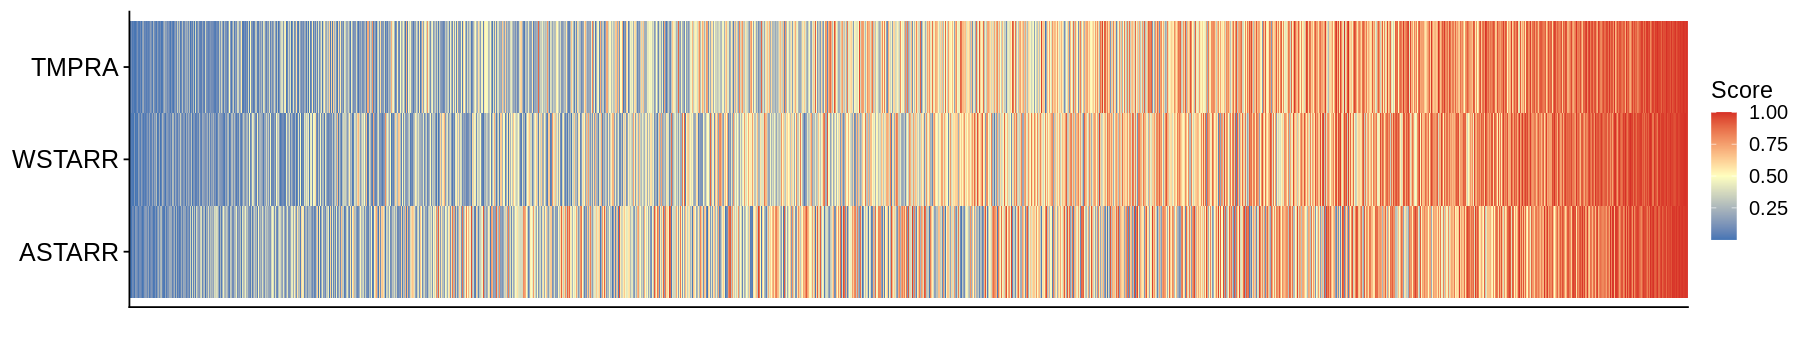

In [62]:
dat = dat_peak_log2fc
dat = dat %>% 
    dplyr::mutate(
        Assay = factor(Assay, levels=assays),
        Peak  = factor(Peak,  levels=peaks),
        Score = RankNorm_Total
    )

gpt = ggplot(dat, aes(x=Peak, y=Assay, fill=Score)) +
    geom_tile() +
    labs(x="", y = "") +
    theme_cowplot() + 
    theme_text +
    theme_fill

gpt_score = gpt
options(repr.plot.height=3, repr.plot.width=15)
print(gpt)

In [65]:
annots = c('DNase-H3K4me3', 'CTCF-only,CTCF-bound', 'Low-DNase', 'DNase-H3K4me3,CTCF-bound', 'DNase-only', 'dELS,CTCF-bound', 'pELS,CTCF-bound', 'PLS,CTCF-bound', 'dELS', 'PLS', 'pELS')
print(length(annots))

[1] 11


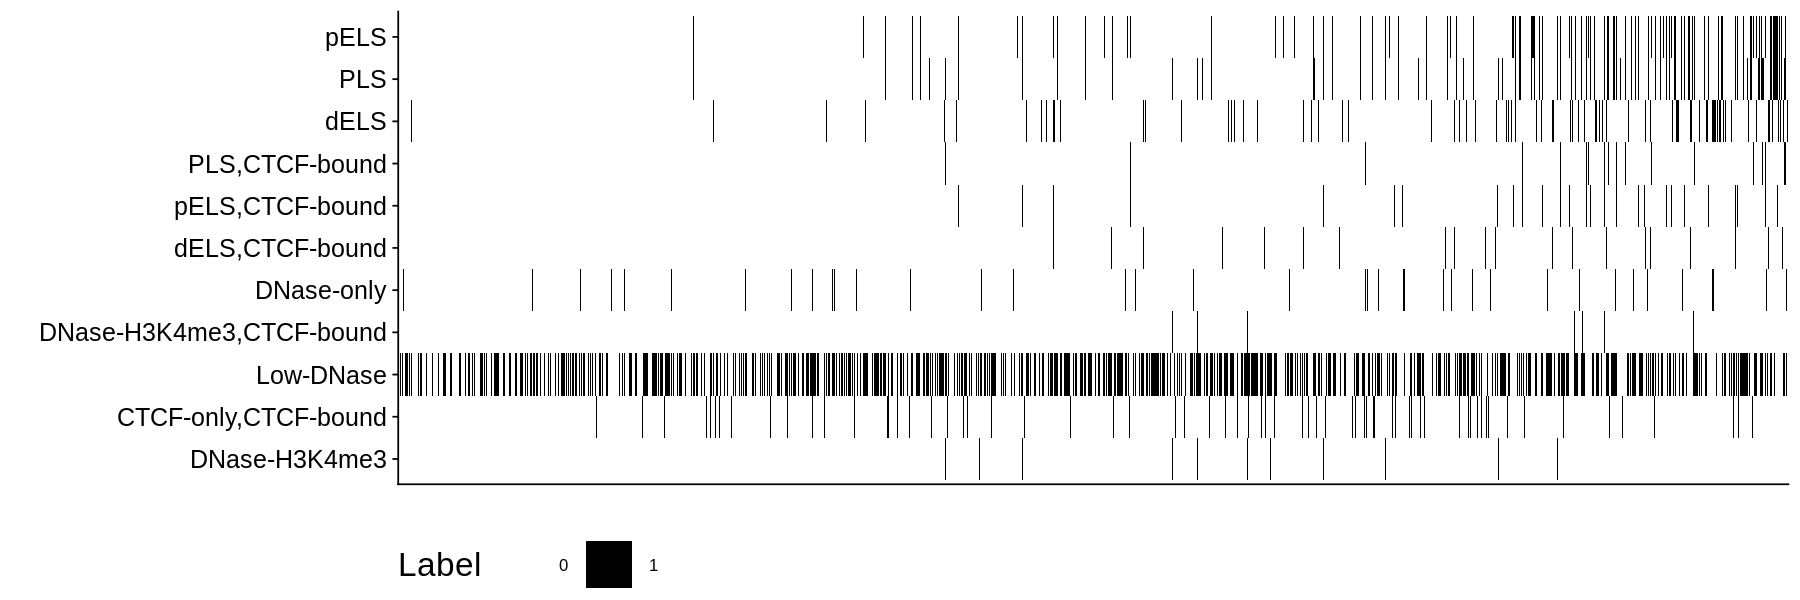

In [66]:
dat = dat_annot
dat = dat %>% dplyr::mutate(
    Peak  = factor(Peak,  levels=peaks),
    Annot  = factor(Annot,  levels=annots)
)
    
gpt = ggplot(dat, aes(x=Peak, y=Annot, fill=Label)) +
    geom_tile() +
    scale_fill_manual(values = c("1" = "black", "0" = "white")) +
    labs(x="", y="") +
    theme_cowplot() +
    theme(axis.text.x = element_blank(),
          axis.text.y = element_text(size=15),
          axis.ticks.x = element_blank(),
          legend.position = "bottom",
          legend.key.size = unit(1, 'cm'),
          legend.title = element_text(size=20),
          legend.text = element_text(size=10))

gpt_annot = gpt
options(repr.plot.height=5, repr.plot.width=15)
print(gpt)

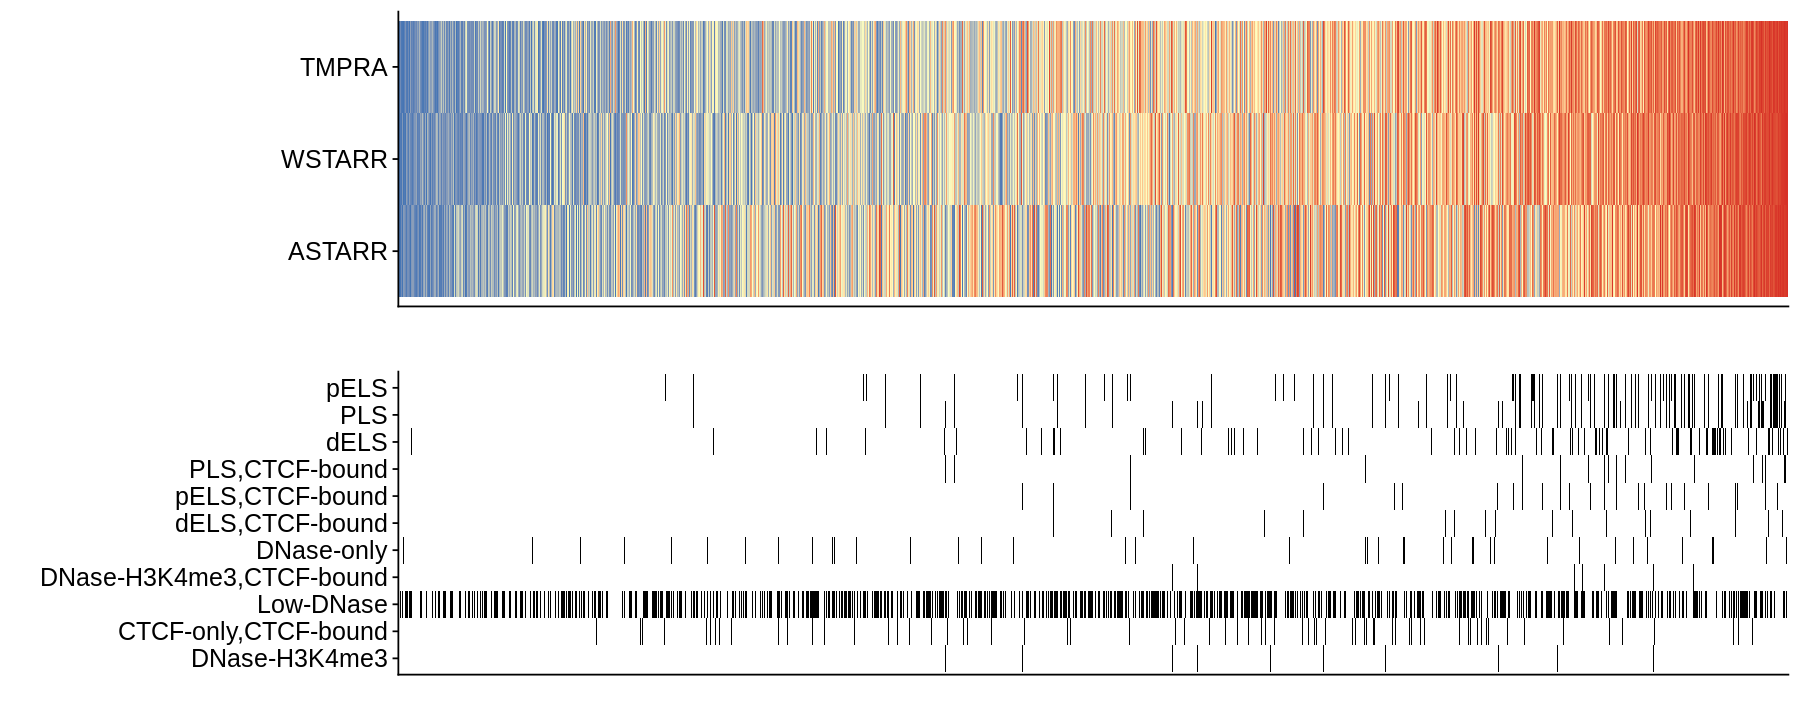

In [67]:
options(repr.plot.height=6, repr.plot.width=15)
plot_grid(
    gpt_score + theme(legend.position = "none"), 
    gpt_annot + theme(legend.position = "none"), 
    ncol  = 1,
    align = "v",
    rel_heights = c(2, 2))

In [71]:
dat = dat_peak_annot_ccre_v4
lst = split(dat, dat$Category)
lst_annot = lst

head(lst[[1]])

Peak,Category,Annotation,Count
<chr>,<chr>,<chr>,<dbl>
chr10_100045961_100046653,CA-CTCF,ccre_v4,1
chr10_100240591_100241246,CA-CTCF,ccre_v4,1
chr10_100338359_100339077,CA-CTCF,ccre_v4,1
chr10_100342247_100342824,CA-CTCF,ccre_v4,1
chr10_100433434_100434444,CA-CTCF,ccre_v4,1
chr10_100481467_100483191,CA-CTCF,ccre_v4,1


In [72]:
dat = dat_peak_log2fc
dat = dat %>% 
    dplyr::group_by(Peak) %>% 
    dplyr::summarise(
        RankNorm = mean(RankNorm_Total),
        .groups  = "drop") %>%
    dplyr::arrange(RankNorm)

peaks  = dat$Peak
assays = c("ASTARR", "WSTARR", "TMPRA")

In [73]:
dat = dat_peak_log2fc
dat = dat %>% dplyr::select(Peak) %>% distinct

for (idx in names(lst_annot)){
    ant = lst_annot[[idx]]
    vec = ant$Peak
    dat[[idx]] = ifelse(dat$Peak %in% vec, "1", "0")
}

dat = dat %>% tidyr::gather(Annot, Label, -Peak)

dat_annot = dat
print(dim(dat))
head(dat)

[1] 13776     3


Peak,Annot,Label
<chr>,<chr>,<chr>
chr11_4539569_4540043,CA-CTCF,1
chr11_4551336_4552012,CA-CTCF,0
chr11_4553969_4555012,CA-CTCF,0
chr11_4569016_4569992,CA-CTCF,0
chr11_4577444_4578031,CA-CTCF,0
chr11_4601808_4602487,CA-CTCF,0


In [74]:
theme_fill = scale_fill_gradient2(
    low  = "#4575b4",
    mid  = "#ffffbf",
    high = "#d73027",
    midpoint = 0.5
)

theme_text = theme(
    axis.ticks.x = element_blank(),
    axis.text.x  = element_blank(),
    axis.text.y  = element_text(size = 15),
    axis.title.x = element_text(size = 20),
    axis.title.y = element_blank()
)

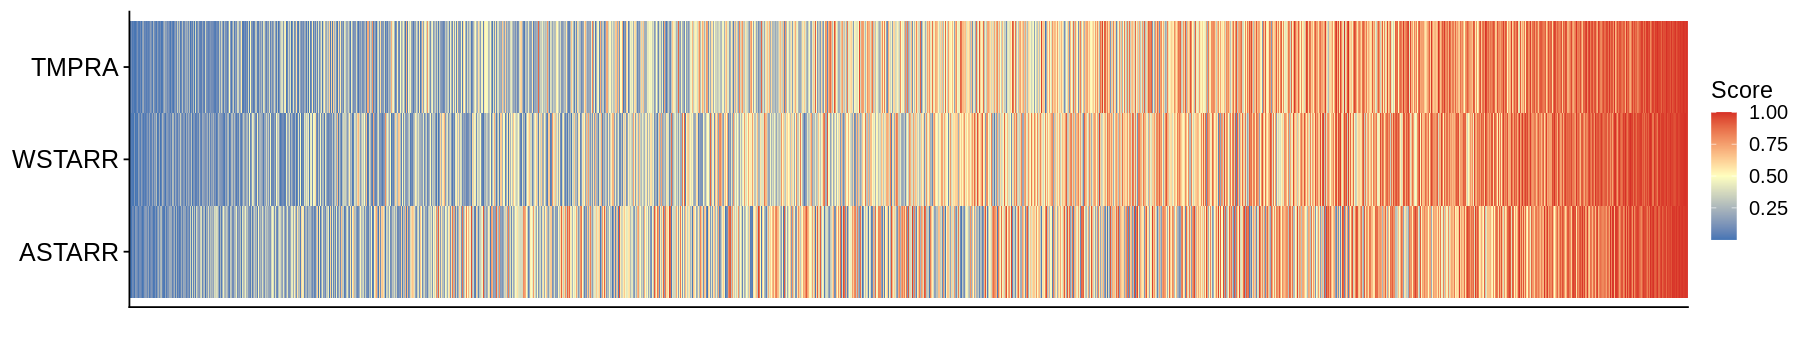

In [75]:
dat = dat_peak_log2fc
dat = dat %>% 
    dplyr::mutate(
        Assay = factor(Assay, levels=assays),
        Peak  = factor(Peak,  levels=peaks),
        Score = RankNorm_Total
    )

gpt = ggplot(dat, aes(x=Peak, y=Assay, fill=Score)) +
    geom_tile() +
    labs(x="", y = "") +
    theme_cowplot() + 
    theme_text +
    theme_fill

gpt_score = gpt
options(repr.plot.height=3, repr.plot.width=15)
print(gpt)

In [76]:
annots = c('Low-DNase', 'CA-only', 'CA-CTCF', 'CA-H3K4me3', 'CA-TF', 'dELS', 'PLS', 'pELS')
print(length(annots))

[1] 8


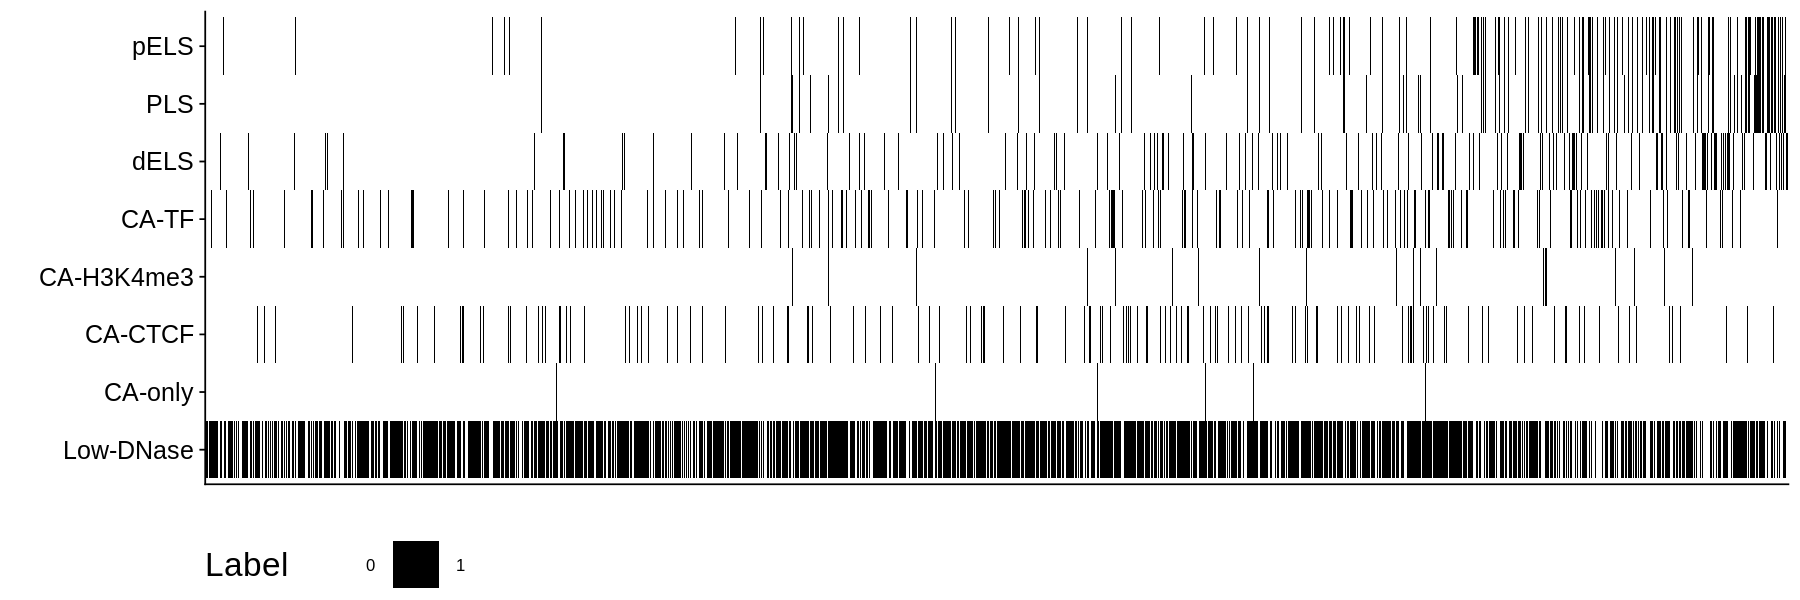

In [77]:
dat = dat_annot
dat = dat %>% dplyr::mutate(
    Peak  = factor(Peak,  levels=peaks),
    Annot  = factor(Annot,  levels=annots)
)
    
gpt = ggplot(dat, aes(x=Peak, y=Annot, fill=Label)) +
    geom_tile() +
    scale_fill_manual(values = c("1" = "black", "0" = "white")) +
    labs(x="", y="") +
    theme_cowplot() +
    theme(axis.text.x = element_blank(),
          axis.text.y = element_text(size=15),
          axis.ticks.x = element_blank(),
          legend.position = "bottom",
          legend.key.size = unit(1, 'cm'),
          legend.title = element_text(size=20),
          legend.text = element_text(size=10))

gpt_annot = gpt
options(repr.plot.height=5, repr.plot.width=15)
print(gpt)

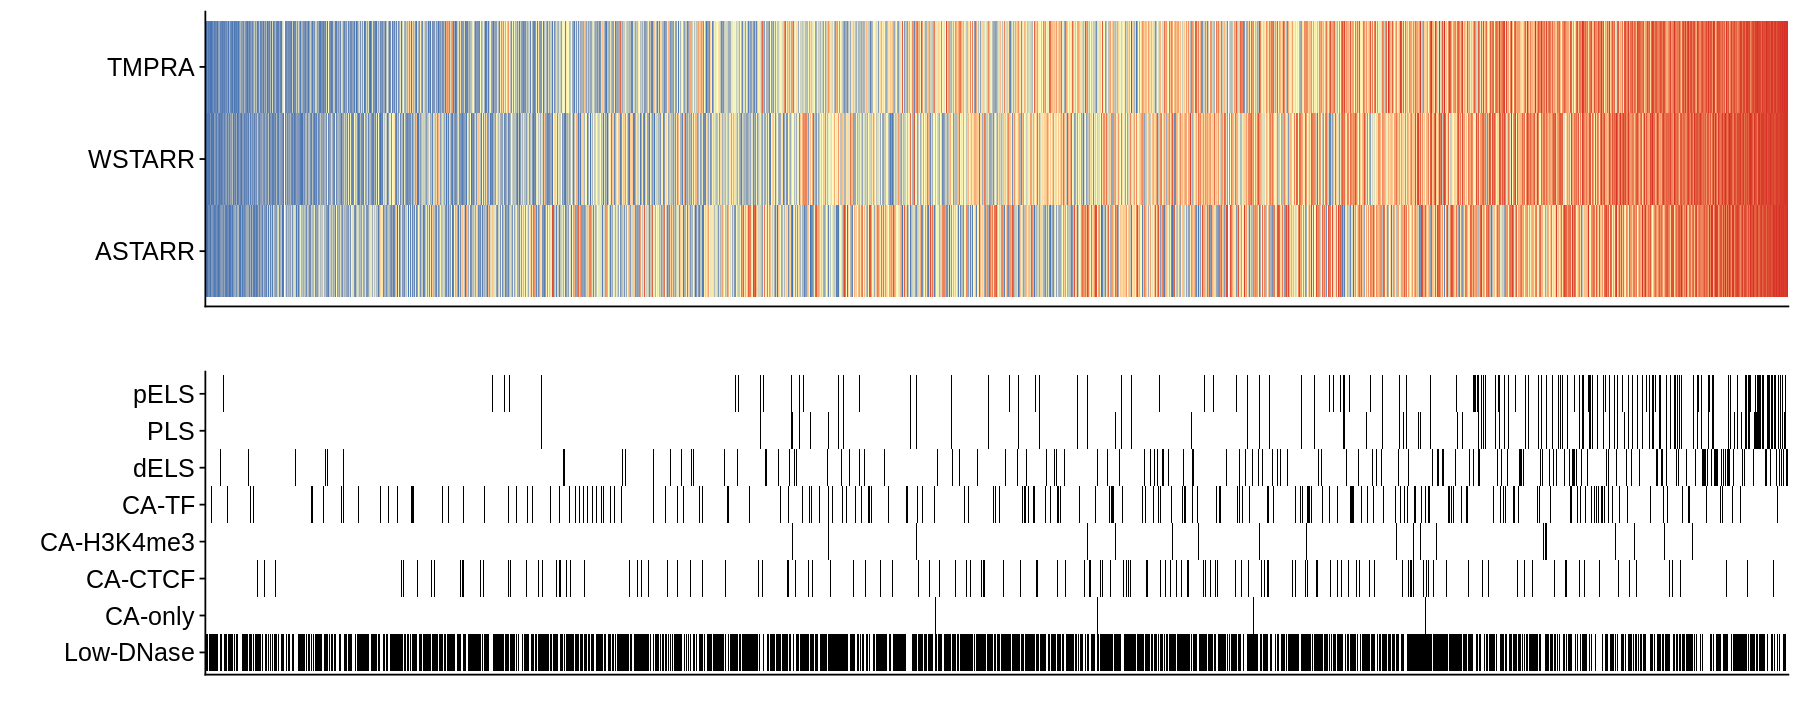

In [78]:
options(repr.plot.height=6, repr.plot.width=15)
plot_grid(
    gpt_score + theme(legend.position = "none"), 
    gpt_annot + theme(legend.position = "none"), 
    ncol  = 1,
    align = "v",
    rel_heights = c(2, 2))